In [4]:
# import tensorflow as tf 
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras


In [24]:
#Loading the handwritten data
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [49]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
#Scaling the data
X_train = X_train/255
X_test = X_test/255

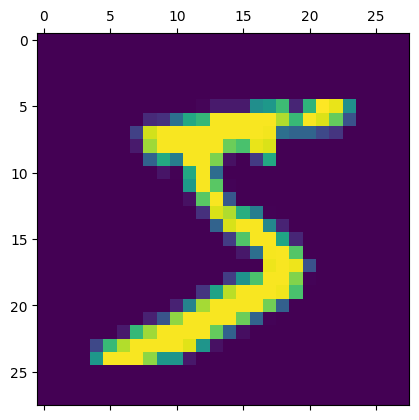

In [26]:
#ploting the image
plt.matshow(X_train[0])

In [27]:
#shape 
X_train.shape

(60000, 28, 28)

In [28]:
#rehshape the dataset
X_train_reshape = X_train.reshape(len(X_train) , 28*28)
X_test_reshape = X_test.reshape(len(X_test) , 28*28)

X_train_reshape.shape


(60000, 784)

In [59]:
#Preparing the Neural netwwork 
model = keras.Sequential([
  keras.layers.Dense(10 , input_shape=(784 ,) , activation="softmax")  #10 is the output shape and input shape is 784 
])


model.compile(
  optimizer ='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

model.fit(X_train_reshape , y_train , epochs=5)

c:\Users\yethu\Desktop\repos\DeepLearning_Projects\HandWritten_Digits_classification\d_venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8087 - loss: 0.7240
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9121 - loss: 0.3157
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9220 - loss: 0.2842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9261 - loss: 0.2708
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9266 - loss: 0.2643


In [60]:
#predicting
y_pred = model.predict(X_test_reshape)
print(y_pred[0])
print(np.max(y_pred[0]))
np.argmax(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[4.4568224e-06 5.7748358e-11 9.8678665e-06 7.1607730e-03 4.3756435e-07
 3.4844008e-05 2.2426452e-10 9.9240351e-01 2.7879754e-05 3.5826766e-04]
0.9924035


7

In [30]:
#test data testing
model.evaluate(X_test_reshape , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9135 - loss: 0.3042


[0.2661183476448059, 0.9247999787330627]

In [44]:
#confusion matrix
y_pred_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test ,predictions= y_pred_labels)

cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    8,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   4,   11,  934,   12,    7,    4,   11,   10,   34,    5],
       [   3,    1,   22,  923,    0,   24,    2,   11,   15,    9],
       [   1,    2,    6,    1,  898,    0,   10,    4,    8,   52],
       [  10,    3,    5,   32,    7,  780,   14,    7,   27,    7],
       [  11,    3,    7,    1,    7,   12,  914,    2,    1,    0],
       [   1,    7,   22,    9,    6,    0,    0,  950,    1,   32],
       [   7,   11,    6,   31,    9,   30,    9,   13,  847,   11],
       [  10,    7,    2,   12,   19,    8,    0,   24,    3,  924]])>

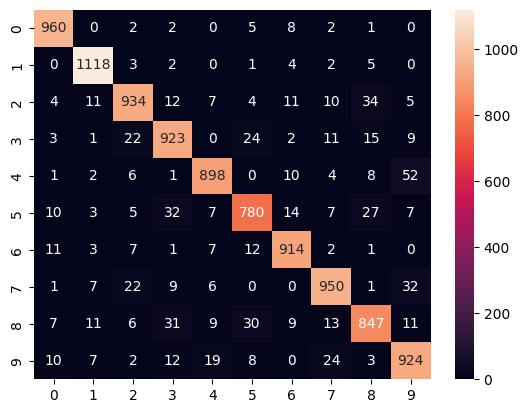

<Figure size 1000x700 with 0 Axes>

In [53]:
import seaborn as sns
sns.heatmap(cm , annot=True ,fmt='d')
plt.figure(figsize=(10,7))
plt.xlabel ='Predicted'
plt.ylabel = 'Actual'


In [54]:
#ADDING HIDDEN LAYERS

#Preparing the Neural netwwork 
model = keras.Sequential([
  keras.layers.Dense(100 , input_shape=(784 ,) , activation="relu"),  #100 is the no of neurons in hidden layers and input shape is 784 
  keras.layers.Dense(10 , activation="sigmoid")  #10 is the output shape and input shape already mentioned in first layer

  
])


model.compile(
  optimizer ='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

model.fit(X_train_reshape , y_train , epochs=5)

c:\Users\yethu\Desktop\repos\DeepLearning_Projects\HandWritten_Digits_classification\d_venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8709 - loss: 0.4562
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9606 - loss: 0.1364
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9737 - loss: 0.0873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9794 - loss: 0.0679
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9847 - loss: 0.0515


In [55]:
#predicting
y_pred = model.predict(X_test_reshape)
print(y_pred[0])
print(np.max(y_pred[0]))
np.argmax(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[9.2194870e-04 1.2519749e-01 1.7300662e-01 9.5529944e-01 1.0025598e-04
 2.3057403e-03 2.8832861e-09 9.9999100e-01 8.8098170e-03 1.2232421e-01]
0.999991


7

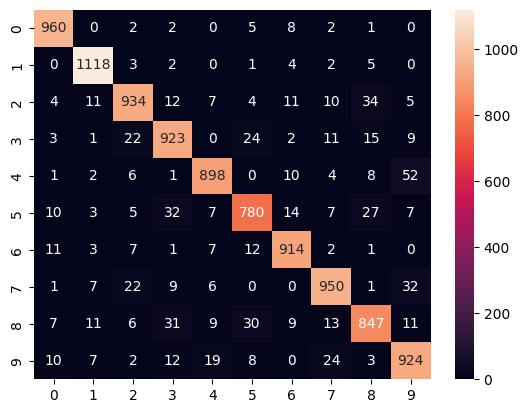

<Figure size 1000x700 with 0 Axes>

In [56]:
import seaborn as sns
sns.heatmap(cm , annot=True ,fmt='d')
plt.figure(figsize=(10,7))
plt.xlabel ='Predicted'
plt.ylabel = 'Actual'


In [57]:
#test data testing
model.evaluate(X_test_reshape , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0923


[0.08079666644334793, 0.9761999845504761]

FLATTEING USING KERAS FUNCTIONS

In [58]:
#ADDING HIDDEN LAYERS

#Preparing the Neural netwwork 
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(100 , activation="relu"),  #100 is the no of neurons in hidden layers and input shape find from first
  keras.layers.Dense(10 , activation="sigmoid")  #10 is the output shape and input shape already mentioned in first layer

  
])


model.compile(
  optimizer ='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

model.fit(X_train , y_train , epochs=5)

c:\Users\yethu\Desktop\repos\DeepLearning_Projects\HandWritten_Digits_classification\d_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8727 - loss: 0.4488
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9604 - loss: 0.1301
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9741 - loss: 0.0867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9809 - loss: 0.0627
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9844 - loss: 0.0501
